In [1]:
import pandas as pd
from TrajectoryClusteringAnalysis.tca import TCA

## load data

In [2]:
df = pd.read_csv('../data/mvad_data.csv')
df.insert(0, 'id', df.index)
df.head()

,id,Sep.93,Oct.93,Nov.93,Dec.93,Jan.94,Feb.94,Mar.94,Apr.94,May.94,...,Sep.98,Oct.98,Nov.98,Dec.98,Jan.99,Feb.99,Mar.99,Apr.99,May.99,Jun.99
0,0,EM,EM,EM,EM,TR,TR,EM,EM,EM,...,EM,EM,EM,EM,EM,EM,EM,EM,EM,EM
1,1,FE,FE,FE,FE,FE,FE,FE,FE,FE,...,HE,HE,HE,HE,HE,HE,HE,HE,HE,HE
2,2,TR,TR,TR,TR,TR,TR,TR,TR,TR,...,EM,EM,EM,EM,EM,EM,EM,EM,JL,JL
3,3,TR,TR,TR,TR,TR,TR,TR,TR,TR,...,EM,JL,JL,JL,JL,JL,JL,JL,JL,JL
4,4,FE,FE,FE,FE,FE,FE,FE,FE,FE,...,HE,HE,HE,HE,HE,HE,HE,HE,HE,HE


## pakage initialization

In [3]:
tca = TCA(data=df,
              id='id',
              alphabet=["EM", "FE", "HE", "JL", "SC", "TR"],
              states=["employment", "FE", "HE", "joblessness","school", "training"])

INFO:root:TCA object initialized successfully


Dataset :
data shape:  (712, 71)
state coding:
   alphabet        label  label encoded
0       EM   employment              1
1       FE           FE              2
2       HE           HE              3
3       JL  joblessness              4
4       SC       school              5
5       TR     training              6


## Distance Hamming

In [4]:
distance_matrix = tca.compute_distance_matrix(metric='hamming', substitution_cost_matrix=None)
print("distance matrix :\n",distance_matrix)

INFO:root:Calculating distance matrix using metric: hamming...
c:\Users\ndiaga.dieng\Documents\TrajectoryClusteringAnalysis\venv\lib\site-packages\TrajectoryClusteringAnalysis\clustering.py:84: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  distance_matrix = squareform(np.array(pdist(data.replace(label_to_encoded).drop(columns=['id']), metric=metric)))
INFO:root:Time taken for computation: 0.05 seconds


distance matrix :
 [[0.         1.         0.82857143 ... 0.97142857 0.31428571 0.8       ]
 [1.         0.         0.82857143 ... 0.2        1.         1.        ]
 [0.82857143 0.82857143 0.         ... 0.85714286 0.54285714 0.51428571]
 ...
 [0.97142857 0.2        0.85714286 ... 0.         0.97142857 1.        ]
 [0.31428571 1.         0.54285714 ... 0.97142857 0.         0.51428571]
 [0.8        1.         0.51428571 ... 1.         0.51428571 0.        ]]


INFO:root:Computing the linkage matrix using method: ward...
INFO:root:Linkage matrix computed successfully


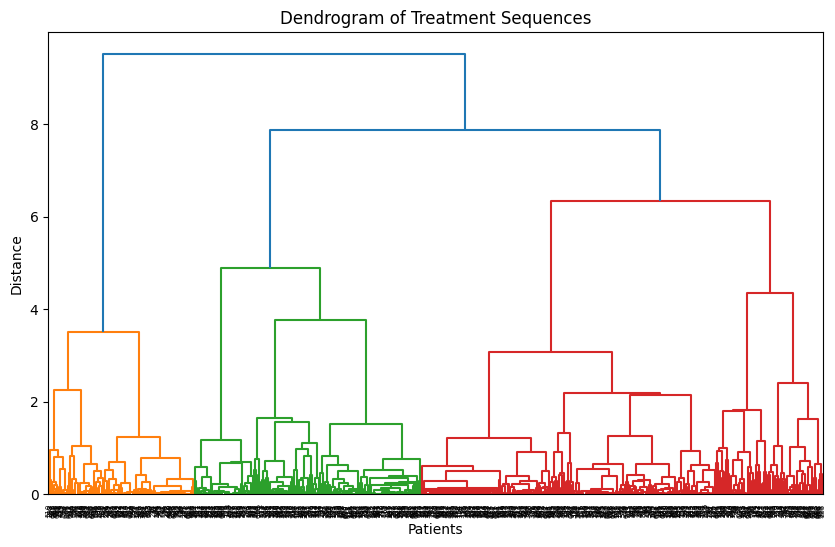

In [5]:
linkage_matrix = tca.hierarchical_clustering(distance_matrix)
tca.plot_dendrogram(linkage_matrix)

### plot heatmap with distance hamming

c:\Users\ndiaga.dieng\Documents\TrajectoryClusteringAnalysis\venv\lib\site-packages\TrajectoryClusteringAnalysis\plotting.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.clustermap(data.drop(id_col, axis=1).replace(label_to_encoded),


<Figure size 800x800 with 0 Axes>

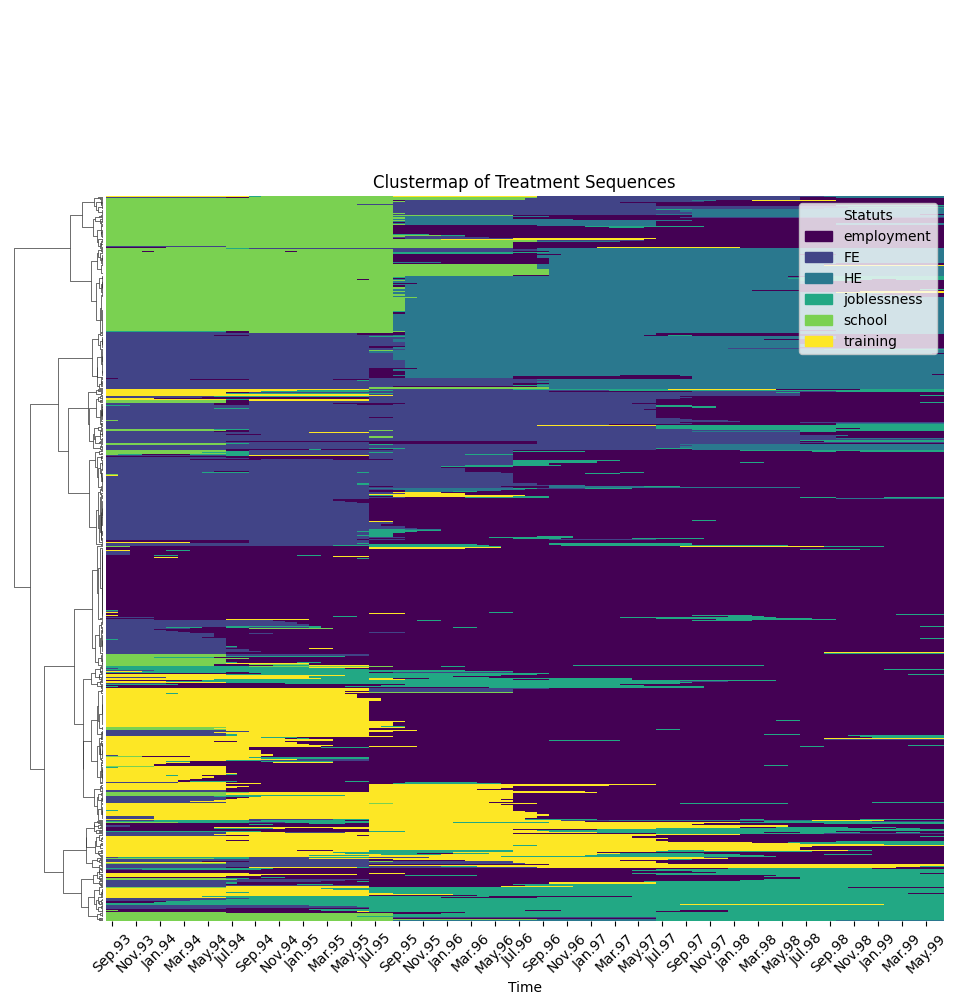

In [6]:
tca.plot_clustermap(linkage_matrix)

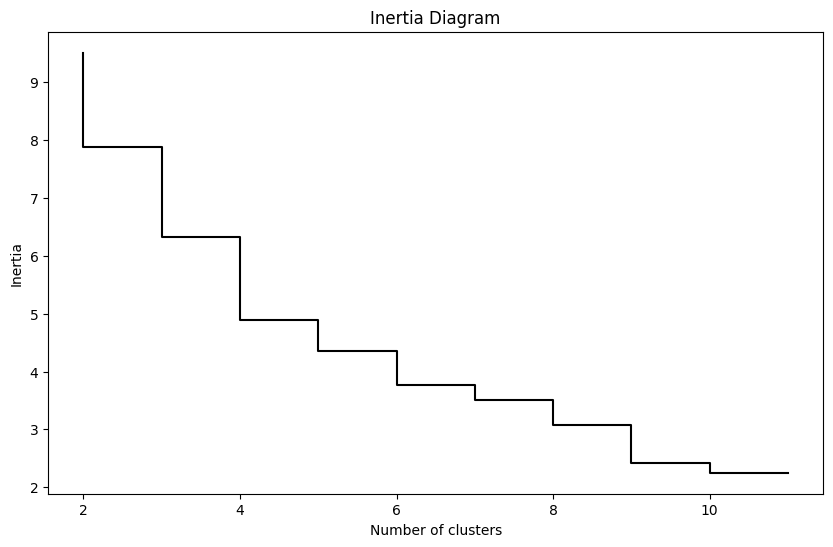

In [7]:
tca.plot_inertia(linkage_matrix)

c:\Users\ndiaga.dieng\Documents\TrajectoryClusteringAnalysis\venv\lib\site-packages\TrajectoryClusteringAnalysis\plotting.py:109: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.heatmap(cluster_df[1].drop(id_col, axis=1).replace(label_to_encoded), cmap=colors, cbar=False, ax=ax, yticklabels=False)
c:\Users\ndiaga.dieng\Documents\TrajectoryClusteringAnalysis\venv\lib\site-packages\TrajectoryClusteringAnalysis\plotting.py:109: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.heatmap(cluster_df[1].drop(id_col, axis=1).replace(labe

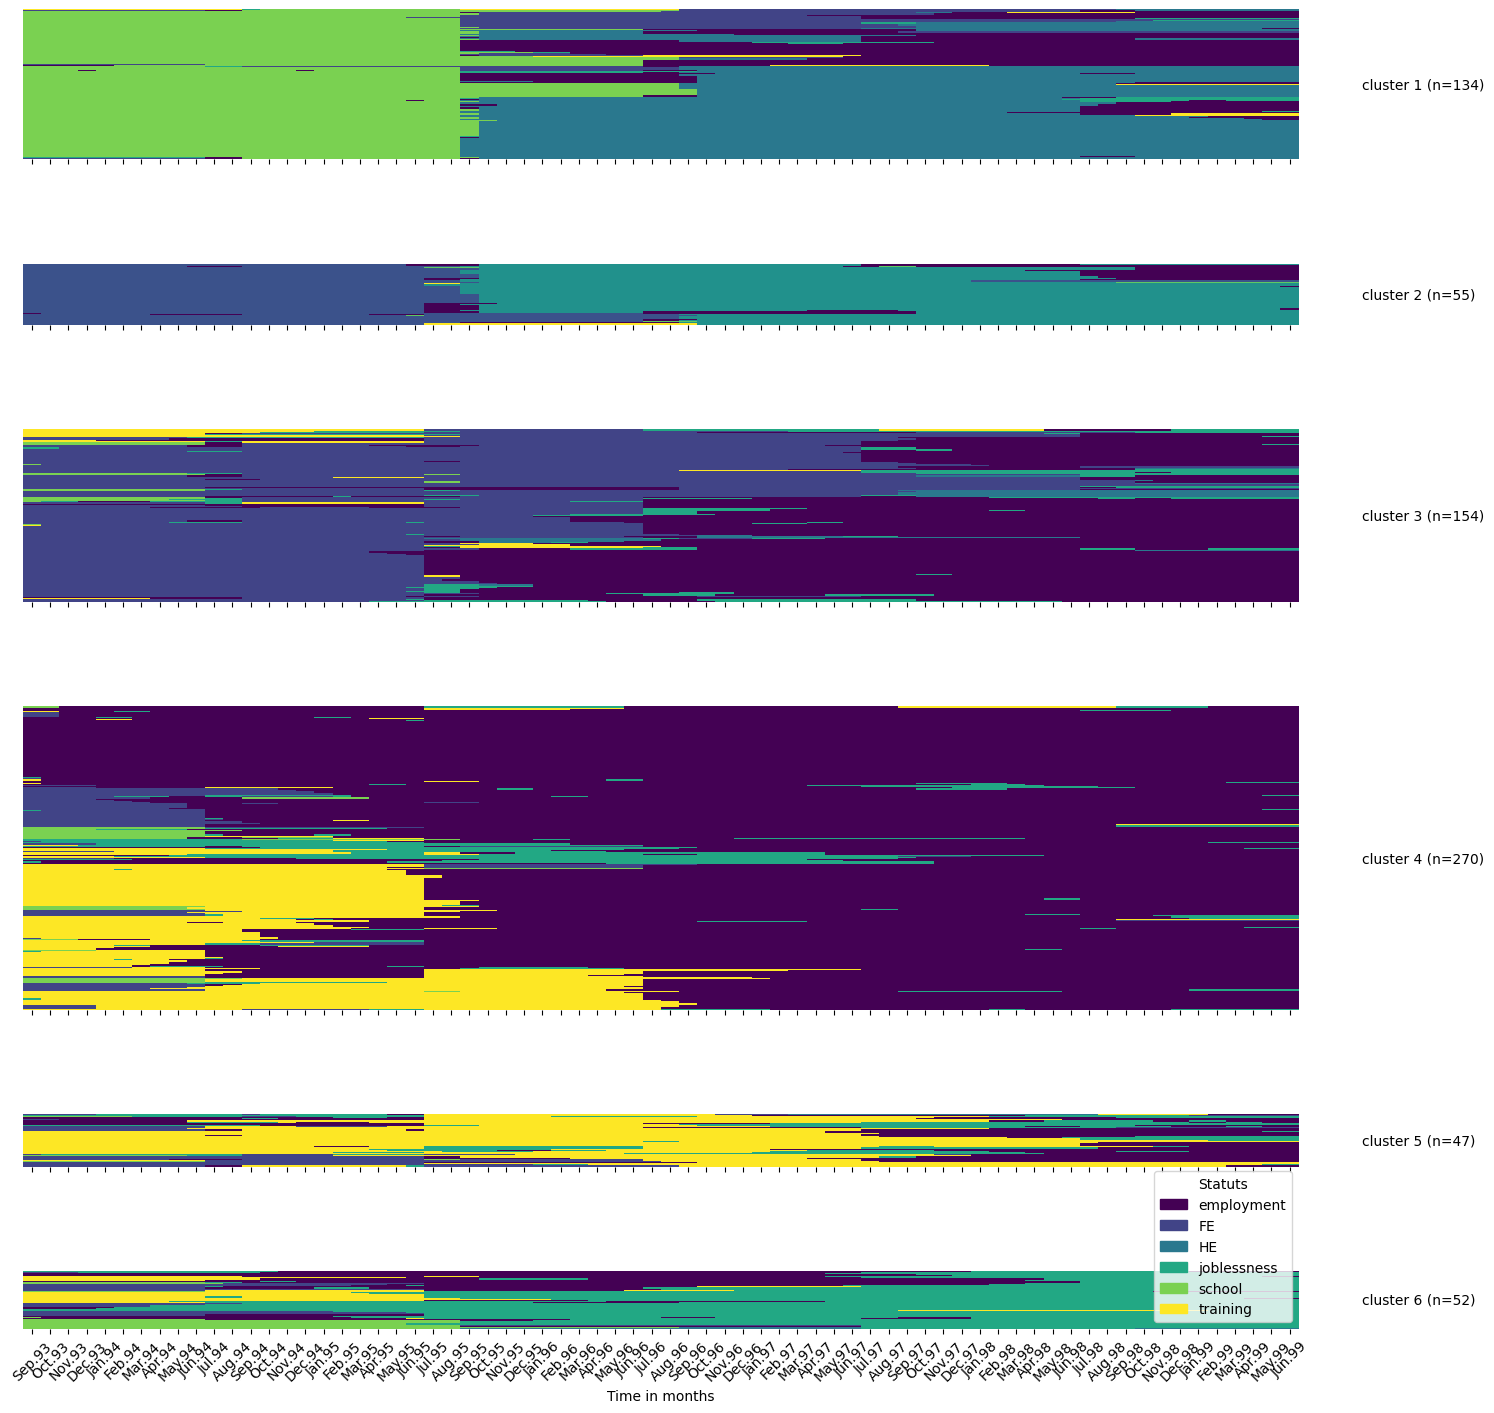

In [8]:
clusters = tca.assign_clusters(linkage_matrix, num_clusters=6)
    
tca.plot_cluster_heatmaps(clusters, sorted=False)

In [9]:
from sklearn.metrics import silhouette_score
silhouette_score(distance_matrix, clusters)

0.2878191452159153

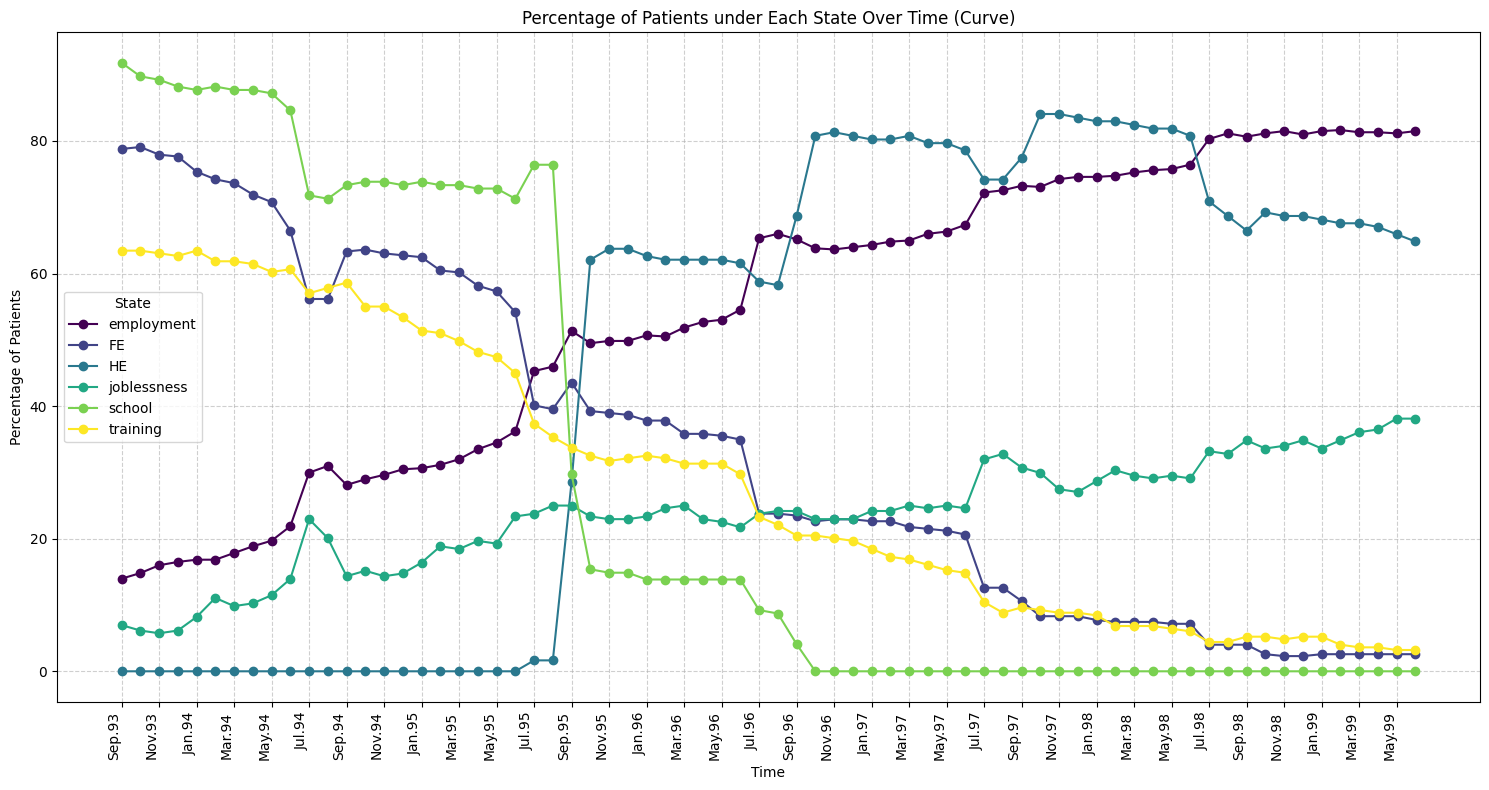

In [10]:
tca.plot_treatment_percentage()

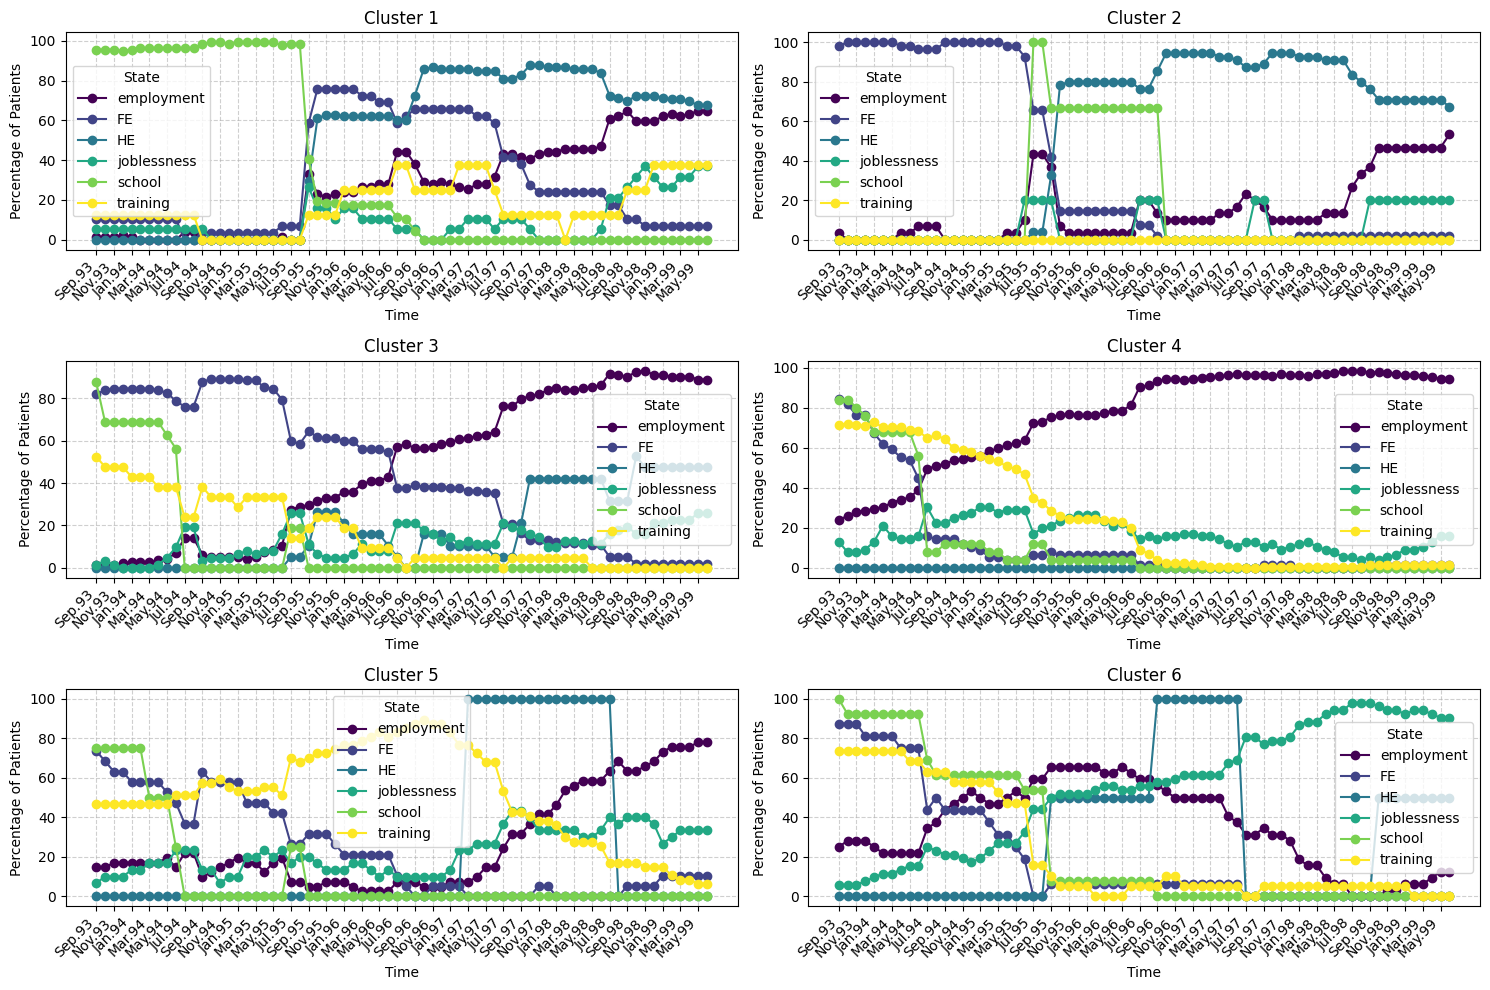

In [11]:
tca.plot_treatment_percentage(clusters=clusters)

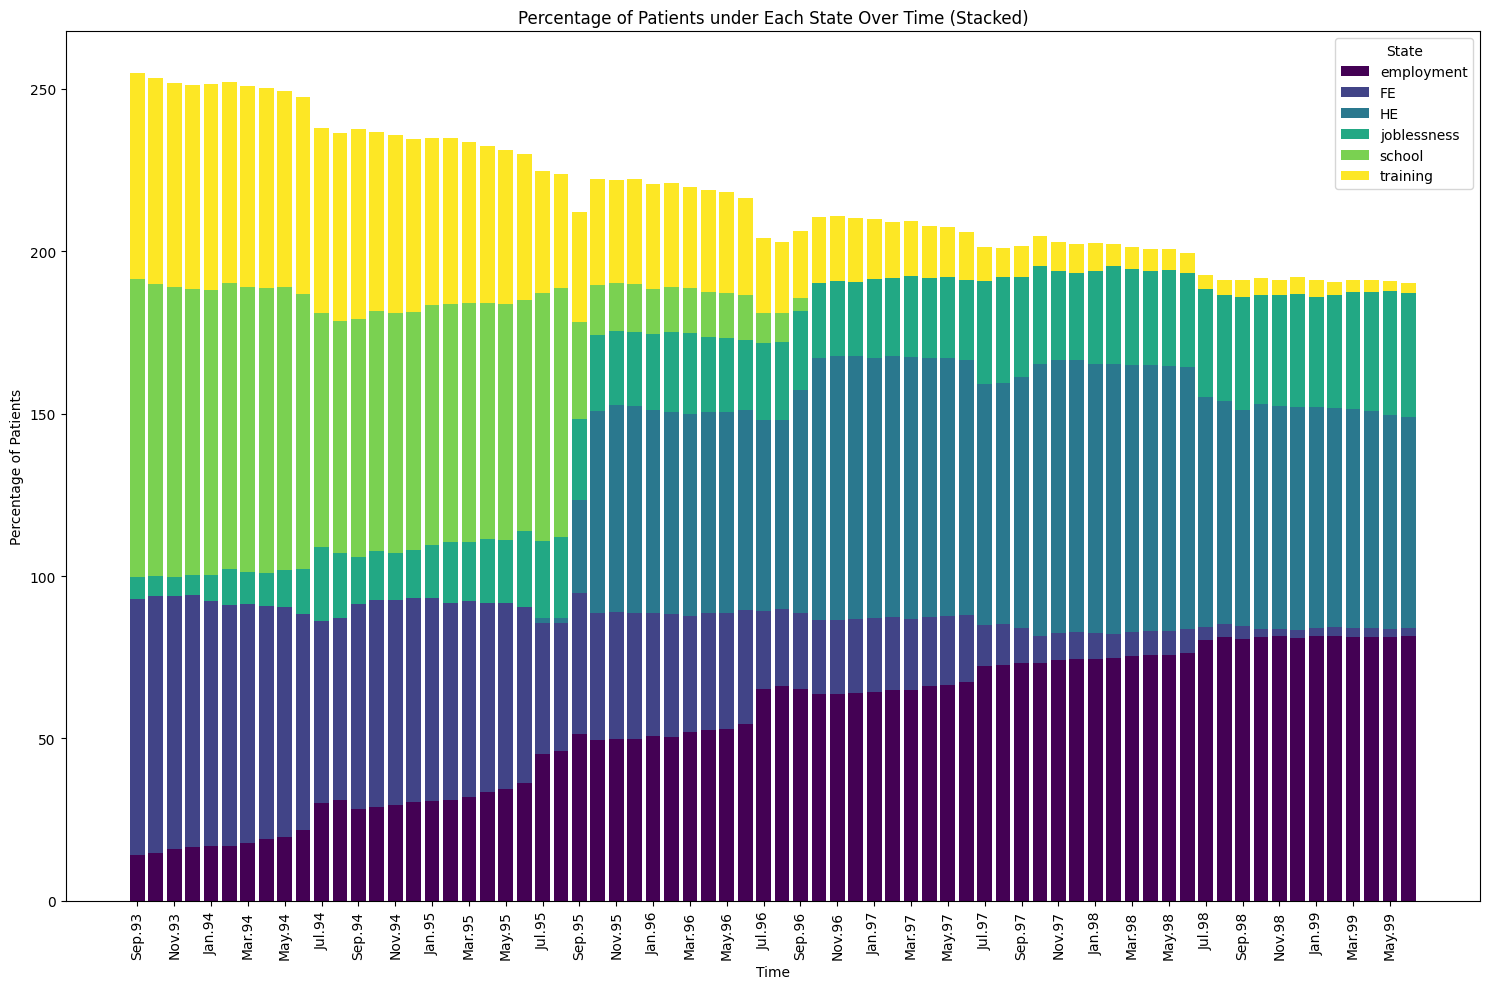

In [12]:

tca.bar_treatment_percentage()

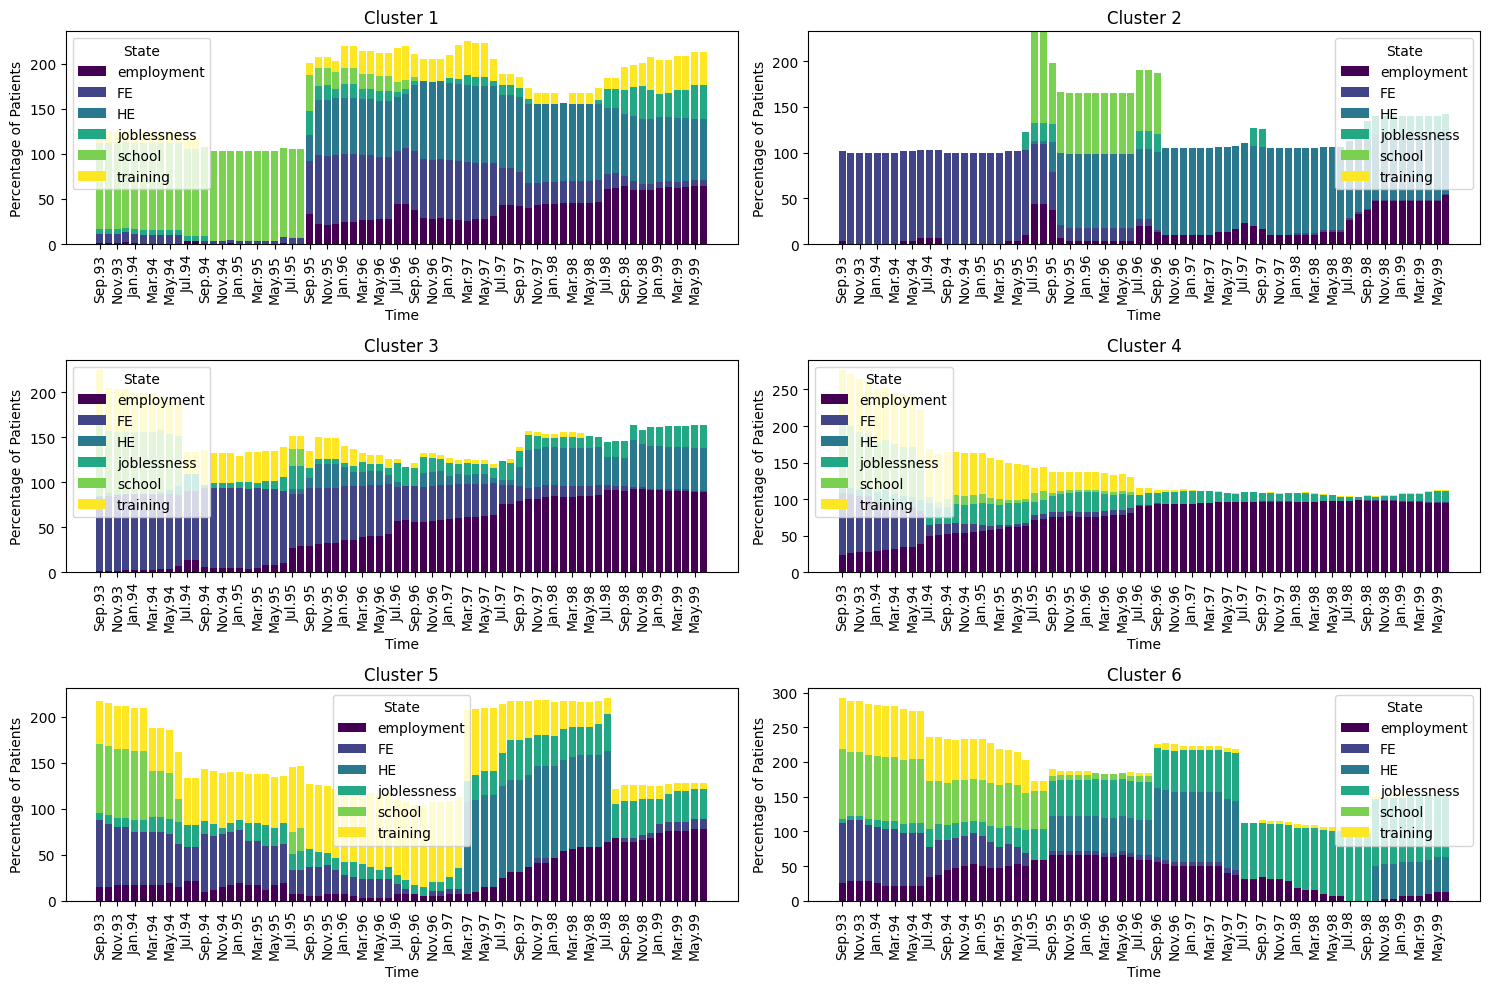

In [13]:
tca.bar_treatment_percentage(clusters=clusters)